# MNIST data

### importing the libraries required

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [ ]:
%%timeit -n 10
mnist_train = pd.read_csv("train.csv")
mnist_test  = pd.read_csv("test.csv")

10 loops, best of 3: 7.07 s per loop


In [ ]:
mnist_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(mnist_train.shape, mnist_test.shape)

((42000, 785), (28000, 784))


### Check whether data is balanced or imbalanced

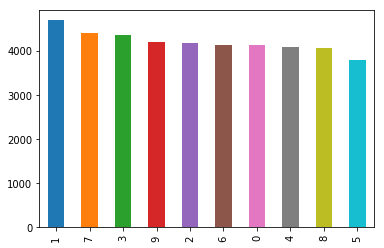

In [ ]:
class = mnist_train['label'].value_counts().plot(kind='bar')
plt.show()

From above figure one can conclude that dataset is balanced

### Principal Component Analysis for data visualization
we convert 784 dimensional data into 2 dimensional to visualize the data in 2D

In [ ]:
%%time
X_raw = mnist_train.drop(['label'], axis = 1, inplace = False)
y = mnist_train['label']

Wall time: 515 ms


In [ ]:
%%time
arr = X_raw.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(arr)
X = pd.DataFrame(x_scaled)

Wall time: 1.1 s


In [ ]:
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(X)
principal_DF = pd.DataFrame(data = principal_components, columns = ['component1', 'component2'])
final_DF = pd.concat( [principal_DF, mnist_train[['label']]], axis = 1)

['#924770', '#6DCBAC', '#93FDCA', '#34C2DA', '#D035D2', '#D2D6B8', '#A749F9', '#2904CD', '#854A96', '#53E8EB']


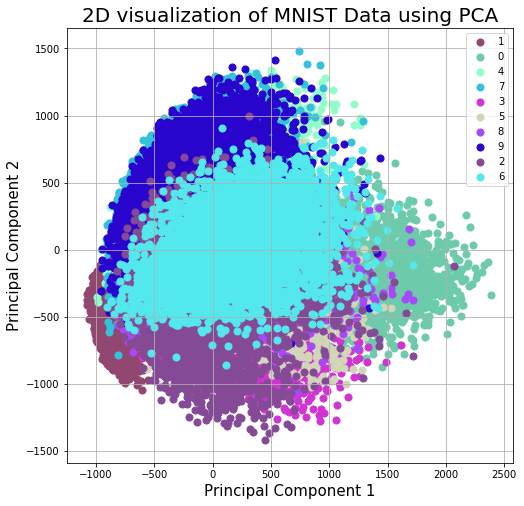

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = plt.subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2D visualization of MNIST Data using PCA', fontsize = 20)
targets = list(mnist_train['label'].unique())
random.seed(10)
colors = []
for i in range(10):
    colors.append('#%06X' % randint(0, 0xFFFFFF))
print(colors)
for target, color in zip(targets,colors):
    indicesToKeep = final_DF['label'] == target
    ax.scatter(final_DF.loc[indicesToKeep, 'component1'], final_DF.loc[indicesToKeep,'component2'], c = color, s=50)
ax.legend(targets)
ax.grid()


### Divide data into 3 parts
1. Train - To calculate nearest neighbors
2. cross-validation: To find optimal value of k (Hyperparameter)
3. Test: To test final accuracy of the model

In [ ]:
X_1, X_test, y_1, y_test = train_test_split(X,y,test_size = 0.25, random_state = 10)
X_train, X_cv, y_train, y_cv = train_test_split(X_1,y_1,test_size = 0.20, random_state = 10)
print(X_train.shape, X_test.shape, X_cv. shape, y_train.shape, y_test.shape, y_cv.shape)

((25200, 784), (10500, 784), (6300, 784), (25200L,), (10500L,), (6300L,))


## KNN Classifier

In [ ]:
def trainKNN(X_train, y_train, k): 
    classifier = KNeighborsClassifier(n_neighbors=k, n_jobs = -1)
    classifier.fit(X_train,y_train)
    return classifier

In [ ]:
def predictClassifier(X_test, classifier):
    y_pred = classifier.predict(X_test)
    return y_pred

In [ ]:
def calculateAccuracy(y_pred, y_test):
    accuracy = accuracy_score(y_pred, y_test)
    return accuracy

In [ ]:
%%time
kvalues = [x for x in range(1,50, 6)]
AccuracyList = []
for k in tqdm(kvalues):
    knnClassifier = trainKNN(X_train, y_train, k)
    y_pred = predictClassifier(X_cv, knnClassifier)
    acc = calculateAccuracy(y_pred, y_cv)
    AccuracyList.append(acc)     

100%|██████████| 9/9 [17:51<00:00, 118.83s/it]


Wall time: 17min 52s


In [ ]:
AccuracyList

[0.9633333333333334,
 0.9652380952380952,
 0.9611111111111111,
 0.9568253968253968,
 0.9555555555555556,
 0.9517460317460318,
 0.947936507936508,
 0.9457142857142857,
 0.9442857142857143]

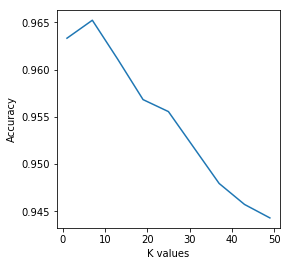

In [ ]:
f = plt.figure(figsize = (4,4))
ax = plt.subplot()
plt.plot(kvalues,AccuracyList)
ax.set_xlabel('K values', fontsize = 10)
ax.set_ylabel('Accuracy', fontsize = 10)
plt.show()

In [ ]:
%%time
clf = trainKNN(X_train,y_train, 7)
y_pred = predictClassifier(X_test, knnClassifier)
acc = calculateAccuracy(y_pred, y_test)
print("Final Accuracy: ",acc)

('Final Accuracy: ', 0.9406666666666667)
Wall time: 3min 49s


## Support Vector Machine Classifier

### GridSearch SVM Classifier One-vs-Rest

In [ ]:
params_grid = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

In [ ]:
%%time 
svm_model = GridSearchCV(SVC(), params_grid, cv=5)
svm_model.fit(X_1, y_1)

Wall time: 8h 21min 8s


In [ ]:
svm_model.fit(X_1, y_1)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [ ]:
svm_model.best_score_

0.9580634920634921

In [ ]:
svm_model.cv_results_

In [ ]:
%%time
bestModel = svm_model.best_estimator_
bestModel.fit(X_train,y_train)
yPred = bestModel.predict(X_test)
accuracy = accuracy_score(y_test,yPred)

Wall time: 6min 14s


In [ ]:
print("svm accuracy = ",accuracy)

('svm accuracy = ', 0.9581904761904761)


### Logistic Regression

In [ ]:
logistic = LogisticRegression(solver='saga', tol=1e-3,n_jobs=2,multi_class = "multinomial")
randVals = []
for i in range(4):
    randVals.append(random.uniform(0,4))
distributions = dict(C=randVals, penalty=['l2', 'l1'])
clf = RandomizedSearchCV(logistic, distributions, random_state=0, verbose = 1000)
search = clf.fit(X_1, y_1)

In [ ]:
print(clf.best_estimator_)
print(clf.best_score_)

LogisticRegression(C=0.177042531458, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='multinomial', n_jobs=2, penalty='l2',
          random_state=None, solver='saga', tol=0.001, verbose=0,
          warm_start=False)
0.9186031746031746


In [ ]:
%%time
best_clf = clf.best_estimator_
best_clf.fit(X_1,y_1)

Wall time: 2min 50s


In [ ]:
%%time
y_predLR = best_clf.predict(X_test)
acc = accuracy_score(y_test,y_predLR)
print(acc)

0.9197142857142857
Wall time: 117 ms


### Decision Tress Classifier

In [ ]:
%%time
maxDepth = [4,6,8,10,12,15,20,30,50,80, 120]
trainAcc = []
CVAcc = []
for depth in tqdm(maxDepth):
    clfDT = DecisionTreeClassifier(criterion='gini',max_depth = depth)
    clfDT.fit(X_train, y_train)
    y_predDTtrain = clfDT.predict(X_train)
    y_predDTcv = clfDT.predict(X_cv)
    accTr = accuracy_score(y_train, y_predDTtrain)
    accCv = accuracy_score(y_cv, y_predDTcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)    

100%|██████████| 11/11 [01:00<00:00,  6.80s/it]


Wall time: 1min


In [ ]:
print(trainAcc)
print(CVAcc)

[0.6329761904761905, 0.7385714285714285, 0.8384920634920635, 0.9097222222222222, 0.9557142857142857, 0.9850793650793651, 0.9958730158730159, 0.9993253968253968, 1.0, 1.0, 1.0]
[0.6395238095238095, 0.7396825396825397, 0.8128571428571428, 0.8447619047619047, 0.8507936507936508, 0.8595238095238096, 0.8504761904761905, 0.843015873015873, 0.8498412698412698, 0.847936507936508, 0.8466666666666667]


In [ ]:
def plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth):
    fig = plt.figure(figsize = (10,5))
    ax = plt.subplot(1,2,1)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Accuracy', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    plt.plot(maxDepth,CVAcc,label='CV Accuracy')
    plt.plot(maxDepth,trainAcc,label='train Accuracy')
    ax.legend()
    trainError = [1-x for x in trainAcc]
    CVError    = [1-x for x in CVAcc]
    ax = plt.subplot(1,2,2)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Error', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    plt.plot(maxDepth,CVError,label='CV Error')
    plt.plot(maxDepth,trainError,label='train Error')
    ax.legend()

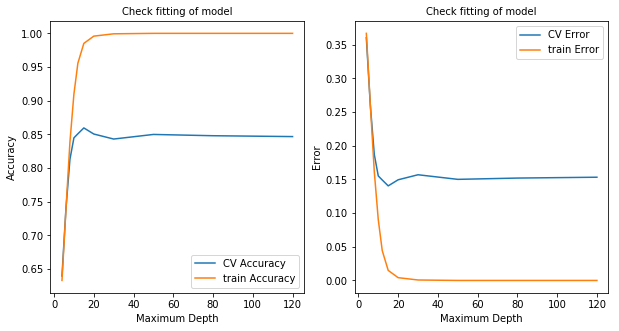

In [ ]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,maxDepth)

In [ ]:
clfDT = DecisionTreeClassifier(criterion='gini',max_depth = 15)
clfDT.fit(X_train, y_train)
y_pred = clfDT.predict(X_test)
print("Final Accuracy DT: ",accuracy_score(y_test,y_pred))

('Final Accuracy DT: ', 0.8492380952380952)


### Random Forest Classifier


In [ ]:
NoEstimators = [50,70,100,130,150,190,230,290,370,450,550,700]
trainAcc = []
CVAcc = []

In [ ]:
for est in tqdm(NoEstimators):
    clfRF = RandomForestClassifier(n_estimators=est, criterion='gini')
    clfRF.fit(X_train, y_train)
    y_predRFtrain = clfRF.predict(X_train)
    y_predRFcv = clfRF.predict(X_cv)
    accTr = accuracy_score(y_train, y_predRFtrain)
    accCv = accuracy_score(y_cv, y_predRFcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv) 

100%|██████████| 12/12 [14:58<00:00, 129.22s/it]


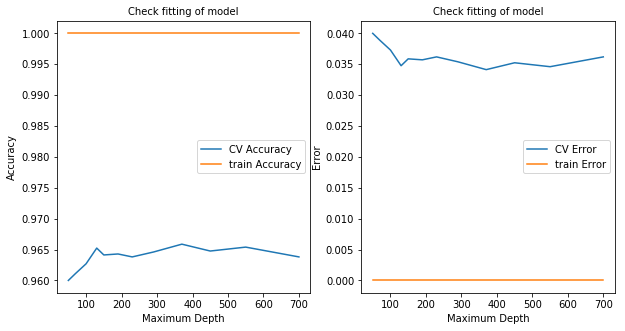

In [ ]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,NoEstimators)

In [ ]:
maxAccuracy = max(CVAcc)
maxAccuracy

0.9658730158730159

In [ ]:
clfRF = RandomForestClassifier(n_estimators=370, criterion='gini')
clfRF.fit(X_train, y_train)
y_predRF = clfRF.predict(X_test)
print("Final Accuracy RF: ",accuracy_score(y_test,y_predRF))

('Final Accuracy RF: ', 0.964)


### XGBOOST

In [ ]:
etaVals = [0.1,0.3,0.5,0.6,0.8,0.9] 
#max_depth parameter we are changing as we know increasing this value may turn model into overfit
trainAcc = []
CVAcc = []
for e in etaVals:
    model = XGBClassifier(eta = e, nthread = 2)
    model.fit(X_train,y_train)
    y_predXGtrain = model.predict(X_train)
    y_predXGcv = model.predict(X_cv)
    accTr = accuracy_score(y_train, y_predXGtrain)
    accCv = accuracy_score(y_cv, y_predXGcv)
    trainAcc.append(accTr)
    CVAcc.append(accCv)     

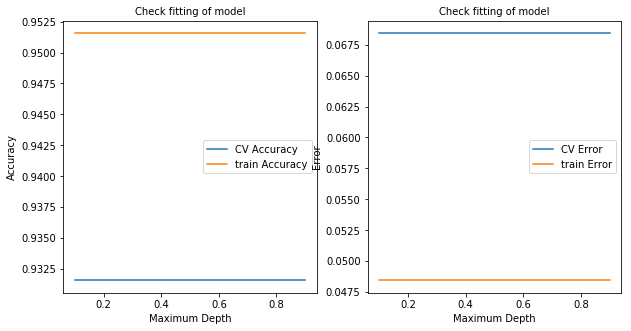

In [ ]:
plotCVandTrainAccuracyAndError(CVAcc,trainAcc,etaVals)

In [ ]:
def plotTestandTrainAccuracyAndError(TestAcc,trainAcc,maxDepth):
    fig = plt.figure(figsize = (10,5))
    ax = plt.subplot(1,2,1)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Accuracy', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    plt.plot(maxDepth,TestAcc,label='Test Accuracy')
    plt.plot(maxDepth,trainAcc,label='train Accuracy')
    ax.legend()
    trainError = [1-x for x in trainAcc]
    TestError    = [1-x for x in TestAcc]
    ax = plt.subplot(1,2,2)
    ax.set_xlabel('Maximum Depth', fontsize = 10)
    ax.set_ylabel('Error', fontsize = 10)
    ax.set_title('Check fitting of model', fontsize = 10)
    plt.plot(maxDepth,TestError,label='Test Error')
    plt.plot(maxDepth,trainError,label='train Error')
    ax.legend()

100%|██████████| 6/6 [1:12:02<00:00, 717.96s/it]


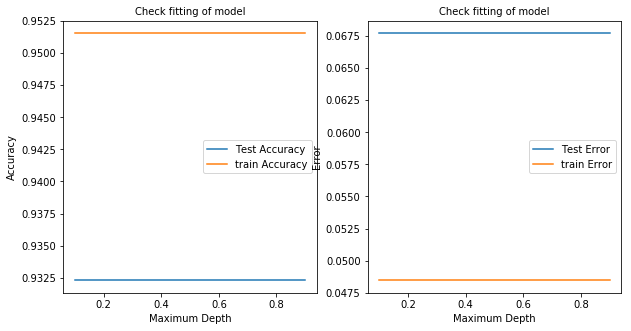

In [ ]:
TestAcc = []
for e in tqdm(etaVals):
    model = XGBClassifier(eta = e, nthread = 2)
    model.fit(X_train,y_train)
    y_predXGTest = model.predict(X_test)
    accTest = accuracy_score(y_test, y_predXGTest)
    TestAcc.append(accTest)

plotTestandTrainAccuracyAndError(TestAcc,trainAcc,etaVals)

### Final Accuracies
    1. KNN                   0.94066  
    2. Logistic Regression   0.9125
    3. SVM                   0.95819
    4. Decision Tree         0.84923
    5. Random Forest         0.964
    6. XGBOOST               0.9325